In [86]:
import pandas as pd
import numpy as np
df97 = pd.read_csv('Datasets/sales_formatted_1997.csv', sep=',')
df98 = pd.read_csv('Datasets/sales_formatted_1998.csv', sep=',')
dfAll = pd.read_csv('Datasets/sales_formatted.csv', sep=',')

In [87]:
df97.head()

,order_id,timestamp,product_name
0,1,852433200,Better Turkey Noodle Soup
1,1,852433200,Jardon Spaghetti
2,2,852433200,Just Right Chicken Noodle Soup
3,2,852433200,High Top Lettuce
4,2,852433200,Sunset Plastic Spoons


In [88]:
df98.head()

,order_id,timestamp,product_name
0,1,885006000,High Top Asparagus
1,1,885006000,Tri-State Lettuce
2,1,885006000,Plato Grape Jam
3,1,885006000,Red Wing Soft Napkins
4,1,885006000,Golden Ice Cream Sandwich


In [89]:
# Orders in 97
len(df97.order_id.unique())

20522

In [90]:
# Orders in 98
len(df98.order_id.unique())

34015

In [91]:
# Orders in All
len(dfAll.order_id.unique())

54537

In [92]:
# Avg products per order in 97
df97_prods_per_order =  df97[['order_id','product_name']].groupby('order_id').agg(['count'])
np.mean(df97_prods_per_order.values)

4.2314101939382125

In [93]:
# Avg products per order in 98
df98_prods_per_order =  df98[['order_id','product_name']].groupby('order_id').agg(['count'])
np.mean(df98_prods_per_order.values)

4.837806849919153

In [94]:
# Avg products per order in All
dfAll_prods_per_order =  dfAll[['order_id','product_name']].groupby('order_id').agg(['count'])
np.mean(dfAll_prods_per_order.values)

4.609622824871188

In [95]:
# Avg orders per day in 97
df97_orders_per_day = df97[['order_id','timestamp']].drop_duplicates().groupby('timestamp').agg(['count'])
np.mean(df97_orders_per_day.values)

63.53560371517028

In [96]:
# Avg orders per day in 98
df98_orders_per_day = df98[['order_id','timestamp']].drop_duplicates().groupby('timestamp').agg(['count'])
np.mean(df98_orders_per_day.values)

106.296875

In [97]:
# Avg orders per day in All
dfAll_orders_per_day = dfAll[['order_id','timestamp']].drop_duplicates().groupby('timestamp').agg(['count'])
np.mean(dfAll_orders_per_day.values)

84.81648522550545

<AxesSubplot:title={'center':'Bi-Weekly sales'}, xlabel='timestamp'>

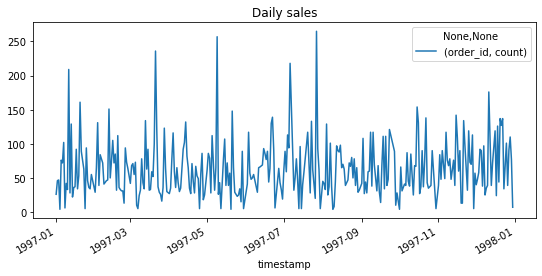

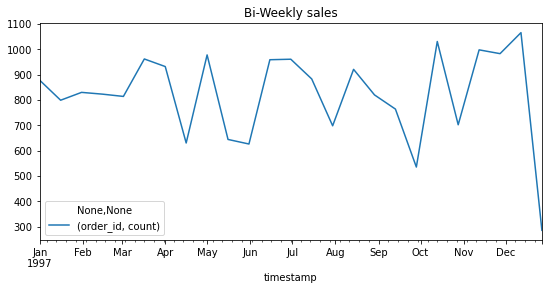

In [98]:
from datetime import datetime
df97_format_dates = df97
df97_format_dates.timestamp = df97_format_dates.timestamp.apply(lambda x: datetime.fromtimestamp(x))
df97_orders_per_day = df97_format_dates[['timestamp','order_id']].drop_duplicates().groupby('timestamp').agg(['count'])
df97_orders_per_day.plot(figsize=(9,4), title='Daily sales')
df97_orders_per_day.resample('15D').sum().plot(figsize=(9,4), title='Bi-Weekly sales')

<AxesSubplot:title={'center':'Bi-Weekly sales'}, xlabel='timestamp'>

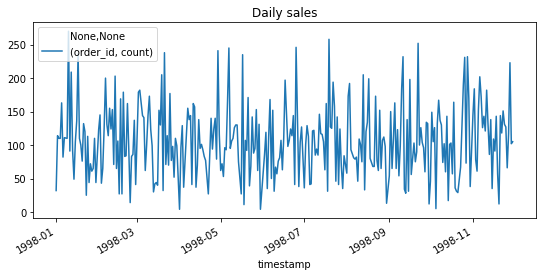

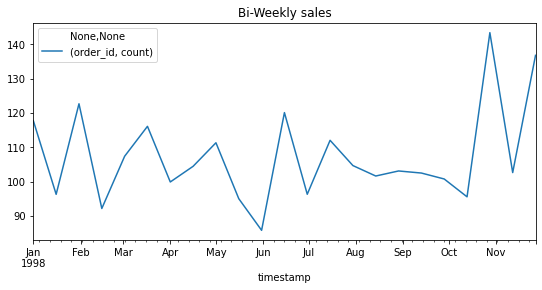

In [99]:
df98_format_dates = df98
df98_format_dates.timestamp = df98_format_dates.timestamp.apply(lambda x: datetime.fromtimestamp(x))
df98_orders_per_day = df98_format_dates[['timestamp','order_id']].drop_duplicates().groupby('timestamp').agg(['count'])
df98_orders_per_day.plot(figsize=(9,4), title='Daily sales')
df98_orders_per_day.resample('15D').mean().plot(figsize=(9,4), title='Bi-Weekly sales')

<AxesSubplot:title={'center':'Bi-Weekly sales'}, xlabel='timestamp'>

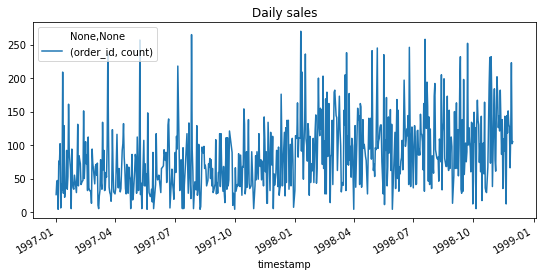

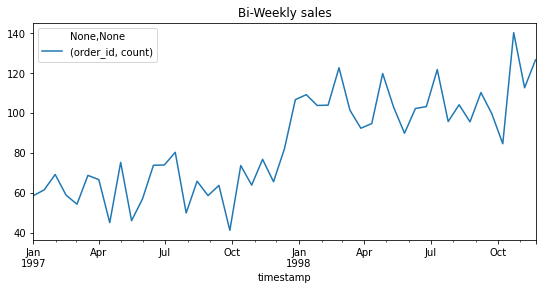

In [100]:
dfAll_format_dates = dfAll
dfAll_format_dates.timestamp = dfAll_format_dates.timestamp.apply(lambda x: datetime.fromtimestamp(x))
dfAll_orders_per_day = dfAll_format_dates[['timestamp','order_id']].drop_duplicates().groupby('timestamp').agg(['count'])
dfAll_orders_per_day.plot(figsize=(9,4), title='Daily sales')
dfAll_orders_per_day.resample('15D').mean().plot(figsize=(9,4), title='Bi-Weekly sales')

In [101]:
# Describe products from 97
df97.product_name.describe()

count                   86837
unique                   1559
top       Special Wheat Puffs
freq                       89
Name: product_name, dtype: object

In [102]:
# Describe products from 98
df98.product_name.describe()

count                    164558
unique                     1559
top       Great English Muffins
freq                        143
Name: product_name, dtype: object

In [103]:
# Describe products from All
dfAll.product_name.describe()

count               251395
unique                1559
top       Ebony Mixed Nuts
freq                   205
Name: product_name, dtype: object

In [104]:
# Top 5 products in 97
df97_products = df97[['product_name']]
df97_products.groupby('product_name').value_counts().nlargest(5)

product_name
Special Wheat Puffs           89
Hermanos Broccoli             82
Big Time Ice Cream            80
Red Wing 60 Watt Lightbulb    80
Fabulous Apple Juice          79
dtype: int64

In [105]:
# Top 5 products in 98
df98_products = df98[['product_name']]
df98_products.groupby('product_name').value_counts().nlargest(5)

product_name
Great English Muffins       143
Carrington Ice Cream        140
Nationeel Dried Apples      138
Nationeel Fudge Brownies    138
Booker String Cheese        137
dtype: int64

In [106]:
# Top 5 products in All
dfAll_products = dfAll[['product_name']]
dfAll_products.groupby('product_name').value_counts().nlargest(5)

product_name
Ebony Mixed Nuts                205
Moms Roasted Chicken            203
Nationeel Dried Apples          203
Steady Childrens Cold Remedy    202
Steady Whitening Toothpast      202
dtype: int64